In [1]:
from neural_priors.utils.plotting import plot_prf_predictions
from neural_priors.utils.data import Subject, get_all_subject_ids, get_all_behavioral_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
from scipy import stats, odr
from braincoder.models import LogGaussianPRF, GaussianPRF
from braincoder.optimize import ParameterFitter
from braincoder.utils import get_rsq
#
plt.rcParams['legend.frameon'] = False
np.set_printoptions(linewidth=140)
pd.set_option('display.width', 170) # 80
pd.options.mode.copy_on_write = True
pd.set_option('display.max_columns', 70)

/Users/apc/Documents/Neuro/numerosity-fmri/neural_priors/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
bids_folder = '../../ds-neuralpriors'

In [37]:
subject = '07'

In [38]:
sub = Subject(subject, bids_folder=bids_folder)
data = sub.get_single_trial_estimates(None, smoothed='smoothed', roi='NPCr')
behavior = sub.get_behavioral_data(session=None,) # tasks=['estimation_task', ])
paradigm = behavior['n']
data = pd.DataFrame(data, index=paradigm)


In [39]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,...,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891
n,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20.0,0.871970,1.165343,1.040462,1.260623,-0.017238,0.007117,0.645588,1.249040,0.938919,0.069423,0.207812,0.166799,0.837704,0.993682,0.606576,0.264002,0.229874,1.181929,0.809556,0.381799,0.250465,0.272712,0.170485,0.110546,0.160259,0.098526,-0.113158,-0.146202,0.272213,-0.408000,-0.196903,0.676728,0.676758,0.495603,0.225853,...,1.334090,0.122091,0.448534,-0.347950,0.288462,-0.409932,0.320077,0.102100,-2.248313,-1.238661,0.698468,0.281249,0.618096,0.171587,0.568847,0.590601,0.315736,0.651555,0.585631,-0.066927,0.282543,0.442805,-1.152378,-2.303395,0.706598,0.171979,0.673107,0.254443,0.444499,0.504600,0.344808,-1.835630,0.658542,-1.086891,0.309649
15.0,1.399522,2.051734,1.550085,1.488608,-0.087135,-0.130695,1.126878,1.398125,0.706610,-0.250374,-0.050778,0.453450,1.169177,0.759038,0.246584,-0.420741,-0.150287,1.047849,0.199077,0.044885,-0.292862,-0.512210,-0.386393,0.160932,-0.052901,-0.410023,-0.599054,0.202860,0.188302,-0.493035,-0.117148,0.767492,1.195756,0.897806,0.433498,...,-0.520618,0.358556,-0.596855,-0.058826,0.626525,0.034119,2.092235,1.642467,2.559713,1.421416,0.636347,0.902497,0.209043,1.291549,1.097592,0.275052,0.885657,1.086009,0.186629,-0.120892,0.355785,0.482151,1.370470,2.896719,2.575090,1.374587,1.968722,0.331149,1.118880,0.267346,0.287706,2.449745,2.407680,1.094303,1.072337
22.0,0.768175,1.829253,1.670954,1.173559,0.484303,0.401122,0.667745,0.787894,0.804390,0.501036,0.272792,0.225116,0.701723,0.745286,0.541486,0.221738,-0.049262,0.420615,0.539569,0.373568,0.211674,-0.080082,-0.127569,0.196731,0.366129,0.197894,0.429845,0.046533,0.485165,1.438646,-0.146337,0.550157,1.187663,0.887073,0.684114,...,0.314903,0.282067,0.025119,0.035767,-0.070843,0.013678,1.292094,1.424320,2.667109,1.595200,0.074573,0.743459,0.458646,0.885636,1.161727,0.489240,0.869457,1.552501,0.150496,-0.415177,-0.093397,0.019428,0.516091,2.100462,1.923000,1.237500,1.384661,0.750797,0.654309,0.157971,-0.041696,1.500509,2.148448,0.553590,0.935373
16.0,-0.809639,-0.801213,-0.916221,-0.875338,-0.576274,-0.278387,-0.990288,-0.723268,-0.633207,-0.596945,-0.363215,-0.568526,-1.151862,-0.714687,-0.523464,-0.676068,-0.388802,-1.137716,-0.751166,-0.513234,-0.670421,-0.707044,-0.394772,-0.497683,-0.501395,-0.511743,-0.253248,-0.534010,-0.517909,0.248716,-0.570191,-0.463937,-0.322347,-0.565984,-0.365563,...,-0.006138,0.379696,0.385477,-0.343564,-0.225356,-0.151143,0.895398,1.144700,1.987610,1.628018,0.326198,0.149383,0.086020,0.322171,-0.091413,0.383886,0.110175,0.036171,0.471038,-0.147652,-0.023827,0.373068,0.324820,2.840297,1.625221,0.910236,0.690567,0.165367,0.378223,0.396635,0.458893,2.008795,1.605574,0.564266,0.805918
20.0,0.126297,0.506986,0.819268,0.563458,0.037666,-0.032220,0.061618,-0.019358,-0.190460,-0.028520,-0.110865,-0.533496,0.004408,-0.132640,-0.554422,0.060223,0.048857,0.218535,0.210937,-0.429839,-0.138759,0.045018,0.003151,-0.128860,-0.037342,-0.003353,-0.317532,0.072149,0.108949,-0.499705,0.187213,-0.093073,0.140135,0.351537,0.394768,...,-0.262951,0.529510,0.452512,-0.377868,-0.532325,-0.405782,-1.019619,-0.558028,-0.662708,-0.107746,0.096157,0.114297,-0.143566,-0.081743,0.519997,-0.347694,-0.241566,0.643447,-0.292609,-0.121161,-0.310717,-0.515353,0.483940,-0.269617,0.011989,-0.167256,-0.381881,-0.163673,-0.473620,0.021011,-0.163193,0.010407,-0.367812,0.067526,-0.458591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17.0,-1.104321,-0.746667,-0.789665,-0.842076,-0.458945,-0.066685,-0.764548,-0.62503

In [40]:
mean_resp = data.groupby('n').mean()
var_resp = data.groupby('n').var()
std_resp = data.groupby('n').std()

In [41]:
print( stats.pearsonr(mean_resp.values.flatten(), std_resp.values.flatten()) )
stats.pearsonr(mean_resp.values.flatten(), var_resp.values.flatten())

PearsonRResult(statistic=0.22088863828141325, pvalue=9.922910556393265e-303)


PearsonRResult(statistic=0.24646474296449455, pvalue=0.0)

In [54]:
def odr_1dregression(x, y, data=None):
    if data is None:
        dat = odr.Data(x, y)
    else:
        dat = odr.Data(data[x], data[y])
    myodr = odr.ODR(dat, odr.unilinear, beta0=[1., 0.]) # start point = identity
    res = myodr.run()
    return res

def odr_pred(odr_res, x):
    B = odr_res.beta
    return B[0]*x + B[1]

Beta: [0.43033546 0.16137163]
Beta Std Error: [0.00505594 0.00130317]
Beta Covariance: [[ 8.10339795e-04 -9.43018667e-05]
 [-9.43018667e-05  5.38350750e-05]]
Residual Variance: 0.03154543636583084
Inverse Condition #: 0.3509027069222505
Reason(s) for Halting:
  Sum of squares convergence


PearsonRResult(statistic=0.24646474296449455, pvalue=0.0)

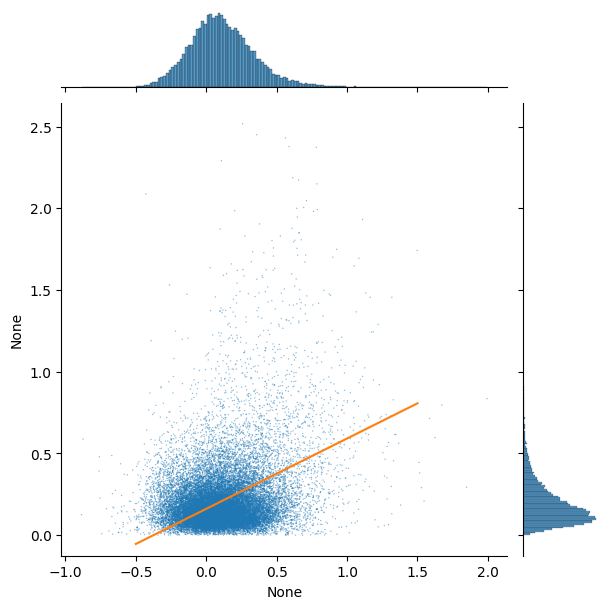

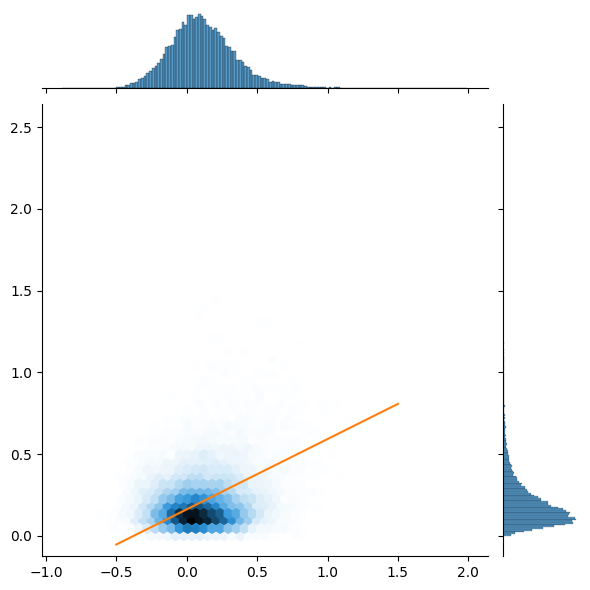

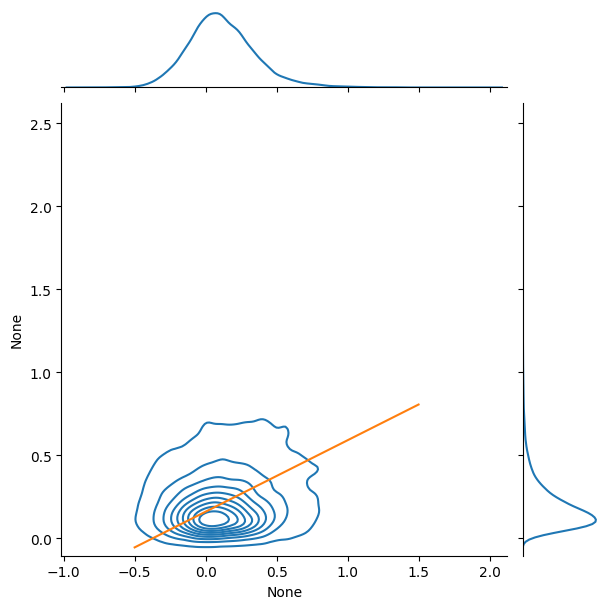

In [82]:
#plt.scatter( mean_resp, var_resp, s=1, alpha=.1)
res = odr_1dregression( x=mean_resp.values.flatten(), y=var_resp.values.flatten()); res.pprint()
for kwargs in [dict(s=1, ec='none', alpha=.5), dict(kind='hex'), dict(kind='kde')]:
    sns.jointplot(x=mean_resp.values.flatten(), y=var_resp.values.flatten(), **kwargs)
    #plt.ylim(-.5, 3)
    xlm = plt.xlim(); ylm = plt.ylim()
    plt.plot( np.linspace(-.5,1.5), odr_pred(res, np.linspace(-.5,1.5)), c='C1')
    plt.xlim(*xlm); plt.ylim(*ylm);
stats.pearsonr(mean_resp.values.flatten(), var_resp.values.flatten())

In [43]:
load_data_via_tsv = True

if load_data_via_tsv:
    df = pd.read_csv(op.join(bids_folder, 'derivatives', 'encoding_model', 'npcr_parameters.tsv'), sep='\t',
                    index_col=[0, 1, 2, 3, 4, 5,],
                    dtype={'subject':str})
    df.columns.name = 'parameter'
    df.index.set_names('voxel', level=-1, inplace=True)
else:
    df = []
    keys = []
    subjects = [f'{subject:02d}' for subject in range(1, 11)]
    #subjects.pop(subjects.index('11'))
    #subjects.pop(subjects.index('16'))

    for subject, range_n, session, smoothed, gaussian in product(subjects, ['wide', 'narrow', None, 'wide2'], [None], [True, False], [False, True]):
    # for subject, range_n, session, smoothed in product(subjects, ['wide', 'narrow', None], [None], [True, False]):
        sub = Subject(subject, bids_folder)
        sub_df = sub.get_prf_parameters_volume(session=session, cross_validated=False, roi='NPCr', smoothed=smoothed, range_n=range_n, gaussian=gaussian)
        if gaussian:
            sub_df = sub_df.rename(columns={'mu':'mode', 'sd':'width'})
        else:
            sub_df = sub_df.rename(columns={'fwhm':'width'})
        df.append(sub_df)
        keys.append((subject,
                    range_n if range_n is not None else 'both', session if session is not None else 'both',
                    'smoothed' if smoothed else 'unsmoothed',
                    'gaussian' if gaussian else 'lognormal'))

    df = pd.concat(df, keys=keys, names=['subject', 'range_n', 'session', 'smoothed', 'model'])
    df.to_csv(op.join(bids_folder, 'derivatives', 'encoding_model', 'npcr_parameters.tsv'), sep='\t')

df = df.unstack(['range_n', 'model', ]).reorder_levels(axis='columns', order=['model', 'parameter', 'range_n'])
df = df.droplevel('session', axis=0)
df = df.sort_index(axis=1, level=['model'], sort_remaining=False)

In [44]:
dfs = df.xs('smoothed', level='smoothed', axis=0)
dfs

model           gaussian                                                                                                                                                 \
parameter           mode                                      width                               amplitude                                baseline                       
range_n             wide     narrow       both      wide2      wide    narrow      both     wide2      wide    narrow      both     wide2      wide    narrow      both   
subject voxel                                                                                                                                                             
01      0      37.331580  21.130262  37.328106  11.521615  0.380676  0.393754  0.369219  0.903927  1.185430  0.684489  1.154732  0.730819 -0.130047 -0.100742 -0.096932   
        1      33.823980   1.494949  33.827130  11.690054  0.691515  0.930751  0.669060  0.470582  0.749141  1.000000  0.721397  1.063844 -0.531587 -0.480002 -0.504918   
        2      28.570770  11.896837  28.571964  15.474047  0.455065  0.934176  0.441089  1.315536  0.879009  0.328444  0.838193  0.488743 -0.533938 -0.502003 -0.494765   
        3      15.578845  12.634643  15.078586  15.590552  1.232632  2.400479  1.201911  1.414796  0.484702  0.272002  0.293433  0.609456 -0.345751 -0.334168 -0.312876   
        4      11.837032   1.494949  11.579186  11.841673  0.780043  0.930751  1.052789  0.820361  0.961507  1.000000  0.375331  1.067047 -0.108688 -0.084063 -0.110316   
...                  ...        ...        ...        ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...   
24      492    36.624523  13.366258  36.055935  15.014517  7.887694  0.317352  6.529882  0.257853  0.179277  0.416688  0.146375  0.376711 -0.081771 -0.048361 -0.049289   
        493    39.714540  49.505050  14.872931  15.220987  0.417622  2.702181  0.309882  0.311772  0.381328  1.000000  0.248401  0.457878 -0.037598 -0.040211 -0.042041   
        494    26.751518  14.557327  26.738580  11.160633  0.300333  0.423631  0.308907  0.718432  0.603697  0.423436  0.627107  0.376214 -0.102078 -0.145434 -0.111828   
        495    36.040524  13.333547  13.288157   8.916959  0.266189  0.314657  0.340846  7.300088  0.426411  0.662156  0.410094  0.499994 -0.129351 -0.155859 -0.136442   
        496    40.888668  13.360867  40.934376  11.177691  0.874499  0.319465  0.907807  0.679107  0.837831  0.493523  0.865177  0.472731 -0.120226 -0.161615 -0.129379   

model                                                                                                        lognormal                                              \
parameter                      r2                                        cvr2                                     mode                                       width   
range_n           wide2      wide        narrow      both     wide2      wide    narrow      both     wide2       wide     narrow       both      wide2       wide   
subject voxel                                                                                                                                                        
01      0     -0.242528  0.025201  2.050865e-02  0.013216  0.031572 -0.010708 -0.032013 -0.014043 -0.150754  37.329970  21.100840  37.323320  11.424392   0.888889   
        1     -0.642029  0.021125  6.556511e-07  0.011212  0.036704 -0.077139 -0.059341 -0.039218 -0.112296  33.805660   1.051865  33.803770  11.663486   1.615753   
        2     -0.664763  0.028484  1.959437e-02  0.015086  0.043335 -0.078357 -0.051230 -0.041021 -0.139205  28.579900  11.842651  28.575516  15.337376   1.161424   
        3     -0.462194  0.027097  2.759850e-02  0.014950  0.070238 -0.087892 -0.035467 -0.061280 -0.090636  15.417759  12.328471  15.036807  15.448435   2.801690   
        4     -0.199107  0.027147  3.576279e-07  0.008204  0.050542 -0.059541 -0.024274 -0.040139 -0.09997

In [45]:
# mask narrow good, mask wide good, mask both good, mask either one good
mask_ng = dfs[('gaussian', 'cvr2', 'narrow')] > 0.01
mask_wg = dfs[('gaussian', 'cvr2', 'wide')] > 0.01
mask_bg = (mask_ng & mask_wg)
mask_eg = (mask_ng | mask_wg)
print(mask_ng.sum(), mask_wg.sum(), mask_bg.sum(), mask_eg.sum(), 'over', len(mask_bg) )
print(mask_ng.mean(), mask_wg.mean(), mask_bg.mean(), mask_eg.mean())

2386 1950 756 3580 over 17286
0.13803077635080413 0.11280805275945852 0.04373481430059007 0.20710401480967255


In [46]:
dfs[mask_bg].index.get_level_values('subject').unique()

Index(['02', '04', '05', '07', '08', '09', '10', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '24'], dtype='object', name='subject')

In [47]:
dfs[mask_bg].groupby('subject').apply(lambda x: x.shape[0])

subject
02     13
04     19
05      3
07     89
08     17
09     28
10      2
12    175
13    175
14      6
15      9
16     23
17     12
18      1
19     93
20     36
21      3
22     51
24      1
dtype: int64

In [68]:
mask_bg.loc[subject]

voxel
0      False
1      False
2      False
3      False
4      False
       ...  
887    False
888    False
889     True
890    False
891     True
Length: 892, dtype: bool

In [76]:
mask_bg[mask_bg].loc[subject]

voxel
44     True
76     True
80     True
95     True
98     True
       ... 
881    True
883    True
885    True
889    True
891    True
Length: 89, dtype: bool

In [79]:
mean_resp.loc[:, mask_bg.loc[subject] ]

,44,76,80,95,98,109,141,147,161,167,168,194,195,202,203,204,210,211,231,232,240,247,248,259,292,300,311,320,321,359,368,369,376,401,403,...,550,551,560,572,582,588,622,630,633,640,665,668,672,705,708,737,746,752,758,759,779,784,787,812,813,849,860,868,871,874,881,883,885,889,891
n,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10.0,-0.159932,0.142938,-0.147126,0.107289,0.139707,0.366091,0.136135,0.239047,0.156198,0.207938,0.253662,0.238121,0.242756,0.213731,0.225620,0.255259,0.101167,0.087386,0.369453,0.257539,0.206949,0.243266,0.174323,0.157490,0.564835,0.281321,0.195842,0.162621,0.151489,0.376804,1.082705,0.676609,0.693257,0.180063,0.416070,...,0.235325,0.322857,0.164512,0.213250,0.280195,0.025042,0.443384,0.433283,0.600369,0.011267,0.871795,0.330141,0.418853,0.592653,0.243877,0.275694,0.594384,0.329727,0.202255,0.337635,0.793115,0.393343,0.158787,0.192001,0.379568,-0.014550,-0.009911,0.180584,0.052709,0.042231,0.766395,0.423733,0.211000,0.905656,0.421619
11.0,-0.073646,0.197370,-0.178093,0.134898,0.111332,0.638808,0.206217,0.225789,0.282985,0.323337,0.261789,0.378546,0.284406,0.344243,0.342384,0.305264,0.158100,0.037946,0.460227,0.354974,0.313854,0.359199,0.234249,0.216371,0.622235,0.308063,0.229061,0.170330,0.176326,0.465922,1.133614,0.655019,0.883599,0.154034,0.388201,...,0.253099,0.321265,0.132571,0.134251,0.303718,0.137639,0.295223,0.379588,0.640620,0.128383,0.559295,0.259275,0.434286,0.441627,0.179229,0.304084,0.409641,0.069826,-0.052644,0.082831,0.666541,0.047246,-0.030918,-0.115796,0.007641,0.116246,-0.262060,0.177774,0.100734,0.163568,0.555739,0.293494,0.143344,0.635268,0.287765
12.0,0.139441,0.245302,0.097978,0.333658,0.367516,0.399299,0.072970,0.262791,0.335042,0.330889,0.445824,0.425683,0.494188,0.401105,0.435887,0.517024,0.254972,0.282304,0.509593,0.466157,0.389739,0.483142,0.375038,0.382947,0.704454,0.363327,0.277760,0.293569,0.266604,0.485019,1.283490,0.748551,0.761954,0.255341,0.653224,...,0.379247,0.459031,0.257180,0.216546,0.554180,0.222220,0.512373,0.662873,0.936385,0.231556,0.969386,0.485769,0.646164,0.804627,0.504631,0.133982,0.756230,0.250191,0.052931,0.269961,1.021652,0.329821,0.125702,0.155803,0.325737,0.122377,-0.139180,0.364292,0.436921,0.385922,1.023037,0.719843,0.372938,1.147945,0.566858
13.0,0.251668,0.223687,0.138901,0.157971,0.105797,0.474530,0.148826,0.215729,0.292307,0.290599,0.469525,0.445319,0.503286,0.262760,0.411537,0.563670,0.148645,0.275161,0.418247,0.349551,0.318852,0.474814,0.325000,0.382161,0.624225,0.270532,0.172788,0.268028,0.231054,0.378720,1.126528,0.667127,0.848174,0.267516,0.412886,...,0.281663,0.334349,0.156702,0.156167,0.240889,0.358170,0.416136,0.432516,0.821495,0.294137,0.812896,0.353415,0.612017,0.726328,0.513764,0.105380,0.721989,0.275801,-0.029131,0.265080,0.870933,0.299056,0.049455,0.080983,0.283066,0.138279,-0.044156,0.251842,0.330222,0.359684,0.830794,0.579208,0.306438,1.053081,0.549040
14.0,0.094682,0.214342,-0.042861,0.211348,0.206239,0.272405,0.064516,0.149784,0.314734,0.385626,0.498967,0.484867,0.505043,0.443373,0.540923,0.603780,0.385226,0.347019,0.398130,0.422162,0.395761,0.486095,0.347546,0.396255,0.600003,0.320009,0.241437,0.258170,0.235401,0.365567,1.113443,0.624824,0.773133,0.232000,0.559329,...,0.179188,0.279389,0.177448,0.161224,0.253139,0.261452,0.450328,0.429900,0.751720,0.261704,0.818699,0.385539,0.563203,0.656218,0.400888,-0.061882,0.640745,0.165187,-0.020449,0.174317,0.789791,0.210576,0.008001,0.052999,0.218439,0.068601,-0.151574,0.251314,0.313897,0.382876,0.782932,0.577031,0.294178,0.986697,0.449714
15.0,-0.135826,0.035528,-0.089075,0.052172,0.050159,0.147685,-0.057298,0.132131,0.220415,0.264284,0.302762,0.342832,0.224731,0.274794,0.318868,0.337181,0.136884,0.149188,0.365051,0.245233,0.231867,0.341940,0.174528,0.248808,0.438023,0.194322,0.146133,0.169600,0.115655,0.343917,0.927634,0.499891,0.649548,0.124647,0.405329,...,0.232607,0.285487,0.033929,0.169308,0.271702,0.069015,0.276133,0.371343,0.579367,0.076026,0.647301,0.273385,

Beta: [0.22503281 0.19039714]
Beta Std Error: [0.01029211 0.00353328]
Beta Covariance: [[ 0.00427927 -0.00072705]
 [-0.00072705  0.00050433]]
Residual Variance: 0.024753648507506776
Inverse Condition #: 0.25755942883194527
Reason(s) for Halting:
  Sum of squares convergence


PearsonRResult(statistic=0.29282708150616327, pvalue=1.1040143861049961e-55)

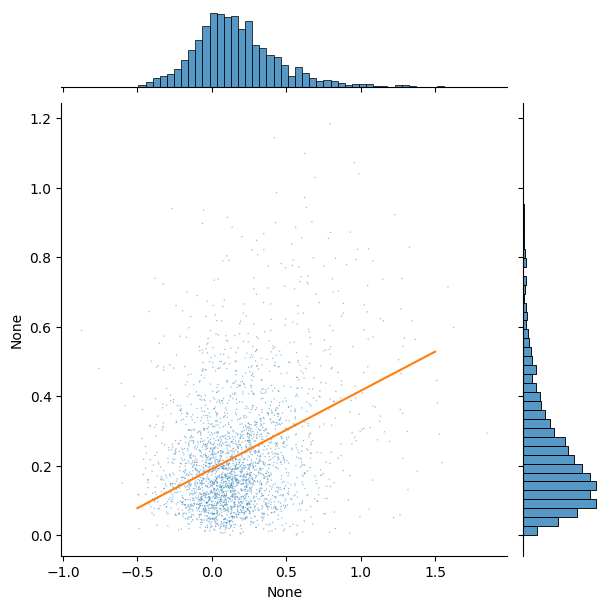

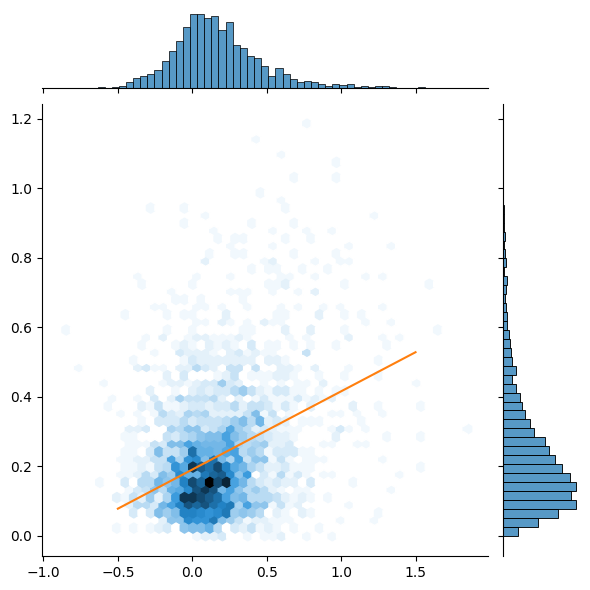

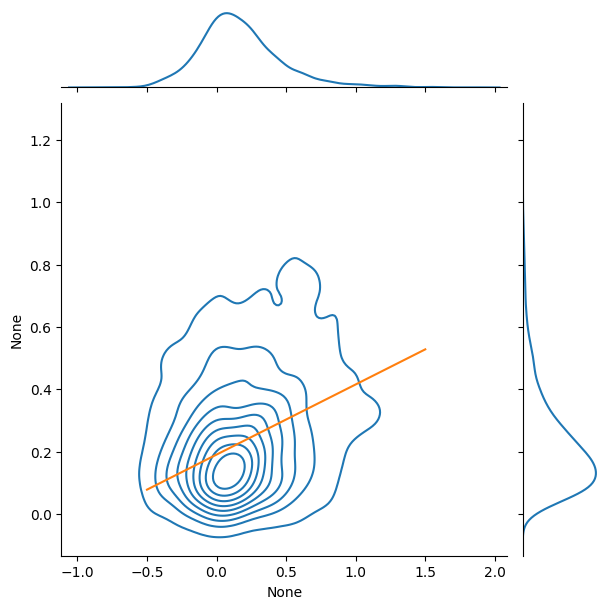

In [81]:
res = odr_1dregression( x=mean_resp.loc[:, mask_bg.loc[subject] ].values.flatten(), y=var_resp.loc[:, mask_bg.loc[subject] ].values.flatten()); res.pprint()
for kwargs in [dict(s=1, ec='none', alpha=.5), dict(kind='hex'), dict(kind='kde')]:
    sns.jointplot(x=mean_resp.loc[:, mask_bg.loc[subject] ].values.flatten(), y=var_resp.loc[:, mask_bg.loc[subject] ].values.flatten(), **kwargs)
    #plt.ylim(-.5, 3)
    xlm = plt.xlim(); ylm = plt.ylim()
    plt.plot( np.linspace(-.5,1.5), odr_pred(res, np.linspace(-.5,1.5)), c='C1')
    plt.xlim(*xlm); plt.ylim(*ylm);
stats.pearsonr(mean_resp.loc[:, mask_bg.loc[subject] ].values.flatten(), var_resp.loc[:, mask_bg.loc[subject] ].values.flatten())